# Modelo de Classificação de Câncer

Esse modelo tem como príncipal objetivo identificar se um câncer é maligno ou benigno.


O dataset utilizado para esse estudo foi
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download


Importando Principais Bibiliotecas

In [152]:
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split as ts
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression as LogisticRegression

from matplotlib import pyplot as plt

import seaborn as sns

Lendo o arquivo com o dataset bruto

In [153]:
df = pd.read_csv('data.csv')

Conhecendo os dados

In [154]:
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Identificando se existem valores Nulos que podem atrapalhar o modelo durante o treinamento

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Com base na análise anterior foi possível identificar que o campo "Unnamed: 32" possui 569 registros nulos, ou seja a coluna inteira.

Por conta da análise dos dados iremos remover a coluna "Unnamed: 32".

In [156]:
df.drop(columns=['Unnamed: 32'], axis=1, inplace=True)


É possível verificar abaixo que a coluna foi removida do dataset.

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Para validar a correlação dos dados categorizar a variável targe diagnose para que ela seja do tipo numérica

In [158]:
encoder = OrdinalEncoder(categories=[['M', 'B']])
df['diagnosis'] = encoder.fit_transform(df[['diagnosis']])


In [159]:
df.groupby("diagnosis").describe()

id                                                          \
           count          mean           std     min       25%       50%   
diagnosis                                                                  
0.0        212.0  3.681805e+07  1.378965e+08  8670.0  861345.0  895366.5   
1.0        357.0  2.654382e+07  1.167397e+08  8913.0  874662.0  908916.0   

                                   radius_mean                               \
                  75%          max       count       mean       std     min   
diagnosis                                                                     
0.0        8911289.75  911296202.0       212.0  17.462830  3.203971  10.950   
1.0        8812816.00  911320502.0       357.0  12.146524  1.780512   6.981   

                                        texture_mean                       \
              25%     50%    75%    max        count       mean       std   
diagnosis                                                                   
0.0        15.075  17.325  19.59  28.11        212.0  21.604906  3.779470   
1.0        11.080  12.200  13.37  17.85        357.0  17.914762  3.995125   

                                                perimeter_mean              \
             min      25%    50%     75%    max          count        mean   
diagnosis                                                                    
0.0        10.38  19.3275  21.46  23.765  39.28          212.0  115.365377   
1.0         9.71  15.1500  17.39  19.760  33.81          357.0   78.075406   

                                                            area_mean  \
                 std    min     25%     50%      75%    max     count   
diagnosis                                                               
0.0        21.854653  71.90  98.745  114.20  129.925  188.5     212.0   
1.0        11.807438  43.79  70.870   78.18   86.100  114.6     357.0   

                                                                         \
                 mean         std    min    25%    50%      75%     max   
diagnosis                                                                 
0.0        978.376415  367.937978  361.6  705.3  932.0  1203.75  2501.0   
1.0        462.790196  134.287118  143.5  378.2  458.4   551.10   992.1   

          smoothness_mean                                                 \
                    count      mean       std      min      25%      50%   
diagnosis                                                                  
0.0                 212.0  0.102898  0.012608  0.07371  0.09401  0.10220   
1.0                 357.0  0.092478  0.013446  0.05263  0.08306  0.09076   

                            compactness_mean                               \
                75%     max            count      mean       std      min   
diagnosis                                                                   
0.0        0.110925  0.1447            212.0  0.145188  0.053987  0.04605   
1.0        0.100700  0.1634            357.0  0.080085  0.033750  0.01938   

                                             concavity_mean            \
               25%      50%      75%     max          count      mean   
diagnosis                                                               
0.0        0.10960  0.13235  0.17240  0.3454          212.0  0.160775   
1.0        0.05562  0.07529  0.09755  0.2239          357.0  0.046058   

                                                                  \
                std      min       25%      50%      75%     max   
diagnosis                                                          
0.0        0.075019  0.02398  0.109525  0.15135  0.20305  0.4268   
1.0        0.043442  0.00000  0.020310  0.03709  0.05999  0.4108   

          concave points_mean                                                 \
                        count      mean       std      min      25%      50%   
diagnosis                                                                      
0.0 

Dado a convenção utilizada em estudos estatiscos, consideramos uma forte correlação quando o valor é >= a 0.7, é possível verificar abaixo os valores dessa convenção:


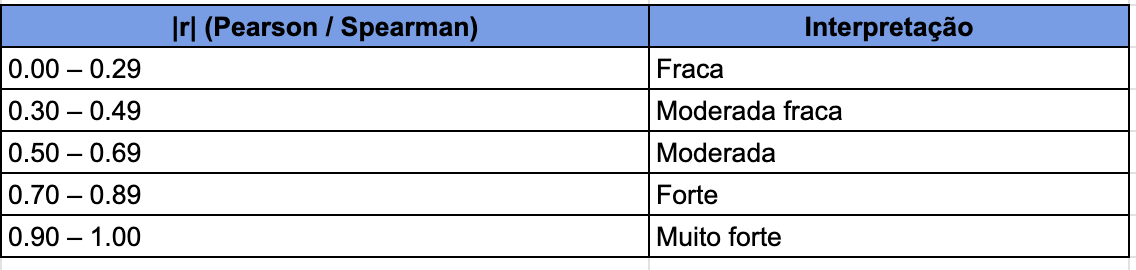

**Abaixo é possível conferir o gráfico de heatmap para verificar as features de maior correlação.**

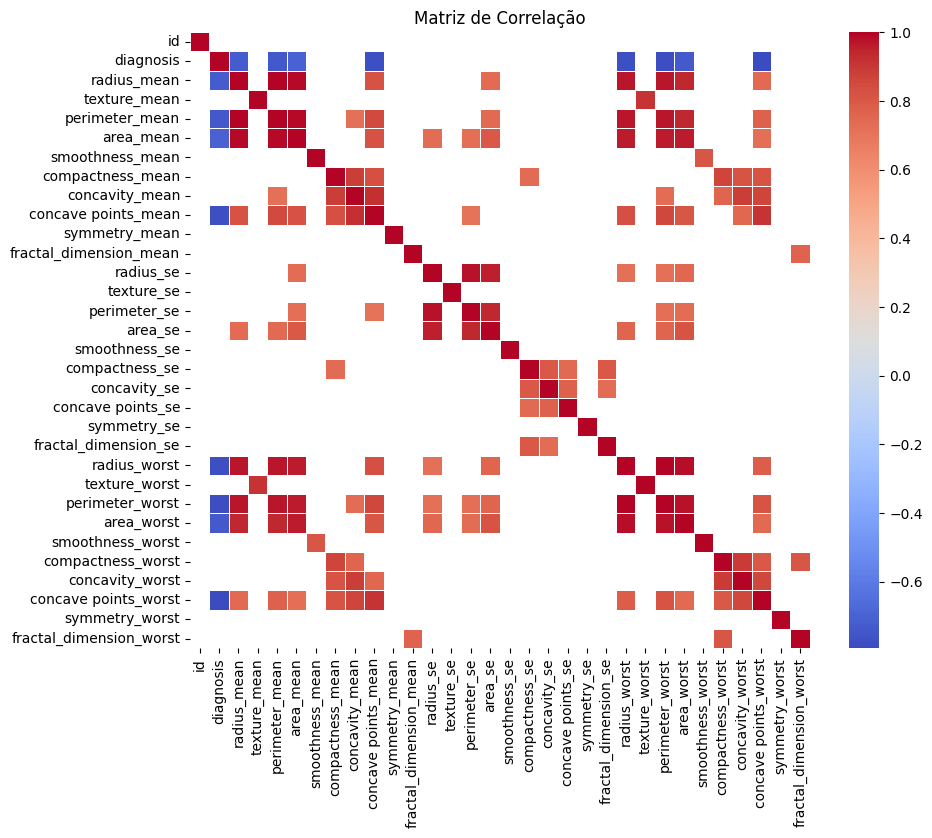

In [160]:
corr = df.corr(numeric_only=True)

threshold = 0.7
dfCorre = corr[(corr.abs() >= threshold)]

plt.figure(figsize=(10, 8))
sns.heatmap(
    dfCorre,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Matriz de Correlação")
plt.show()

Com Base nos dados abaixo é possível verificar apenas as features que possuem uma forte correlação, ou seja maior ou igual que 0.7.

Essa abordagem faz com que o modelo trabalhe de forma mais eficiênte, utilizando apenas os valores que possuem uma correlação forte.

In [161]:
diagnosis = dfCorre.iloc[1]

columns = diagnosis[
    (diagnosis.abs() >= threshold) & (diagnosis.notna())
].index

dfHighCorrelation = df[columns]
dfHighCorrelation.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,0.0,17.99,122.80,1001.0,0.14710,25.38,184.60,2019.0,0.2654
1,0.0,20.57,132.90,1326.0,0.07017,24.99,158.80,1956.0,0.1860
2,0.0,19.69,130.00,1203.0,0.12790,23.57,152.50,1709.0,0.2430
3,0.0,11.42,77.58,386.1,0.10520,14.91,98.87,567.7,0.2575
4,0.0,20.29,135.10,1297.0,0.10430,22.54,152.20,1575.0,0.1625


Com base nos valores apresentados no data frame é possível verificar que a base de dados possui apenas as informações com alta correlação. Também nota-se valores muito diferentes um do outro para maior assertividade do treinamento precisamos normalizar os dados para estar na escala correta

In [162]:
scaler = StandardScaler()
# remove coluna diagnosis para ajustar escala dos valores das demais colunas
columnsWithoutDiagnosis = columns[1:]
values = dfHighCorrelation[columnsWithoutDiagnosis].values
values = scaler.fit_transform(values)

# cria o DataFrame com a coluna diagnosis e os valores na escala padrão
dfScaled = pd.DataFrame(data = values, columns=columnsWithoutDiagnosis)
target = pd.Series(dfHighCorrelation['diagnosis'], name='diagnosis')
dfScaled = pd.concat([dfScaled, target], axis=1)

Com os dados na escala correta, vamos verificar como os dados estão distribuídos em um histograma e se existem outliers

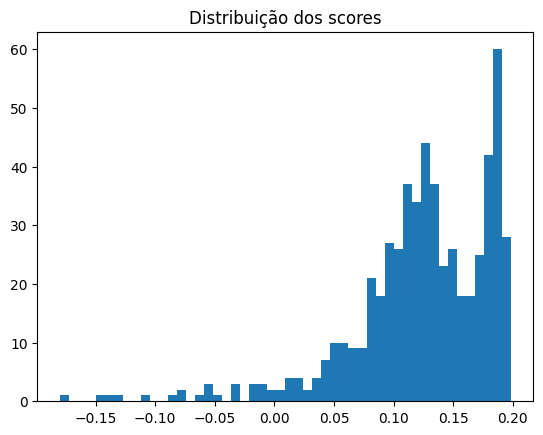

In [163]:
model = IsolationForest(contamination=0.04, random_state=42)
dfScaled['outlier'] = model.fit_predict(dfScaled[columns])

scores = model.decision_function(dfScaled[columns])

plt.hist(scores, bins=50)
plt.title("Distribuição dos scores")
plt.show()


Podemos notar um conjunto grande de scores positivos, ou seja, casos dentro de um padrão. E também alguns outliers.
Como temos muitas features, utilizaremos o PCA para encontrar as principais características para avaliar melhor.

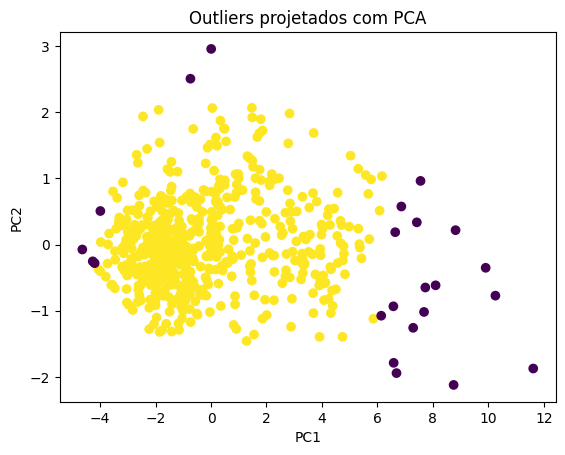

In [164]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(values)

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=dfScaled['outlier'])
plt.title("Outliers projetados com PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Conseguimos notar que o gráfico acima separou bem o conjunto dos outliers.
Sendo assim, seguiremos para o treinamento utilizando esses principais componentes.

Separando o dataset de treino e de teste

In [165]:
dfPca = pd.DataFrame(data = principalComponents,
                  columns = ['PC1', 'PC2'])

target = pd.Series(dfScaled['diagnosis'], name='diagnosis')
dfPca = pd.concat([dfPca, target], axis=1)

x = dfPca.drop(['diagnosis'], axis=1)
y = dfPca['diagnosis']

X_train, X_test, y_train, y_test = ts(
    x, y, test_size=0.25, random_state=42, stratify=y
)
dfPca.head()

,PC1,PC2,diagnosis
0,5.031507,1.342949,0.0
1,4.389011,-0.928886,0.0
2,4.566364,0.783303,0.0
3,0.005309,2.956814,0.0
4,4.047864,-0.467144,0.0


Verificando o melhor valor para K do Knn.

Com base no código abaixo é possível verificar a melhor quantidade de K baseado na acuracia acima de 94%, nesse caso podemos ver que a melhor acurácia é para o K com valor 13 que chega a 0.95.

In [166]:
for i in range(1, 150):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    if(acc > 0.94):
      print(f"k = {i}, Accuracy: {acc}")


k = 4, Accuracy: 0.9440559440559441
k = 5, Accuracy: 0.9440559440559441
k = 11, Accuracy: 0.9440559440559441
k = 12, Accuracy: 0.9440559440559441
k = 13, Accuracy: 0.951048951048951
k = 14, Accuracy: 0.9440559440559441
k = 15, Accuracy: 0.9440559440559441
k = 17, Accuracy: 0.9440559440559441
k = 18, Accuracy: 0.9440559440559441
k = 19, Accuracy: 0.9440559440559441
k = 31, Accuracy: 0.9440559440559441
k = 50, Accuracy: 0.9440559440559441
k = 52, Accuracy: 0.9440559440559441
k = 54, Accuracy: 0.9440559440559441


Efetuando o treinamento do modelo

In [167]:
knnModel = KNeighborsClassifier(
    n_neighbors=13,
    metric='euclidean'
)

knnModel.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

Efetuando a previsão com base no dataset de teste

In [168]:
y_pred = knn.predict(X_test)

Validando a acurácia do modelo

In [169]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091

Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.87        53
         1.0       0.89      0.98      0.93        90

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



Validando o modelo de regressão logistica para garantir a melhor acurácia

In [170]:
logisticRegressionModel = LogisticRegression()

logisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

Validando a acurácia do modelo de regressão logistica

In [171]:
y_pred = logisticRegressionModel.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231

Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        53
         1.0       0.94      0.93      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



Dado a acuracia dos modelos é possível verificar que para esse caso o melhor algoritimo seria a regressão logistica.